In [23]:
import pandas as pd
from matplotlib import pyplot as plt
import random
import numpy as np
import math
import importlib
import mcmc_functions
importlib.reload(mcmc_functions)

from mcmc_functions import *
import importlib

seasons_df = pd.read_csv('/Users/josephsun/Desktop/M4R/code/premier-league-matches.csv')
tables_df = pd.read_csv('/Users/josephsun/Desktop/M4R/code/pl-tables-1993-2024.csv')

In [24]:
recent = seasons_df[seasons_df['Season_End_Year'] == 2023] #2023 season
recent_previous = seasons_df[seasons_df['Season_End_Year'] == 2022]
initial_season = seasons_df[seasons_df['Season_End_Year'] == 1993]
"""" 
Schema: 
Season_End_Year
Wk
Date
Home
HomeGoals
AwayGoals
Away
FTR
"""

'" \nSchema: \nSeason_End_Year\nWk\nDate\nHome\nHomeGoals\nAwayGoals\nAway\nFTR\n'

In [25]:
strength_dict, parameters, acceptance_counters, tracked_parameters, strength_dict_original = (
mcmc(seasons_df, 2015, 2016, burn_in = 10000, iterations = 50000))

In [32]:
acceptance_counters

{'Strength': {'accepted': 27185, 'total': 40062},
 'Home Advantage': {'accepted': 67,
  'total': 2394,
  'percentage': 2.798663324979114},
 'Away Advantage': {'accepted': 63,
  'total': 2548,
  'percentage': 2.4725274725274726},
 'Mu_P': {'accepted': 34, 'total': 2472, 'percentage': 1.3754045307443366},
 'Sigma_P': {'accepted': 34, 'total': 2472, 'percentage': 1.3754045307443366},
 'Eta': {'accepted': 175, 'total': 2524, 'percentage': 6.933438985736926},
 'Sigma_S': {'accepted': 175, 'total': 2524, 'percentage': 6.933438985736926}}

/Users/josephsun/Desktop/M4R/code/mcmc_functions.py:380: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  joined_df['Strength History'] = joined_df.values.tolist()


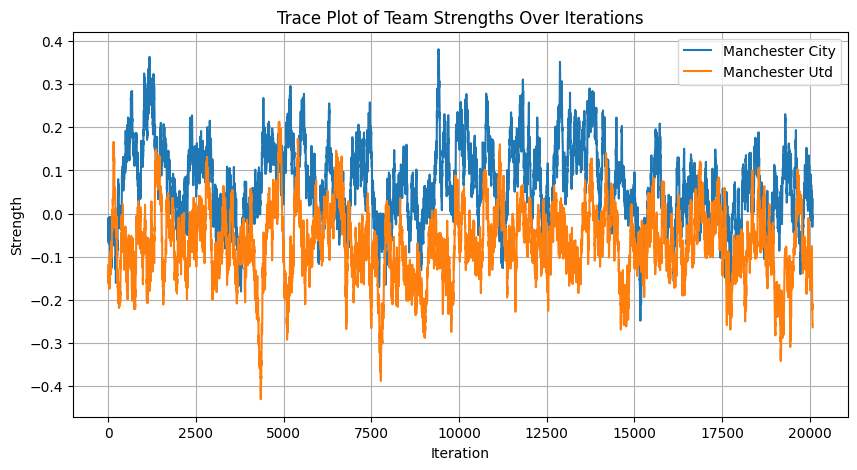

In [33]:
trace_plot_strength(strength_dict, ['Manchester City', 'Manchester Utd'], 2015)

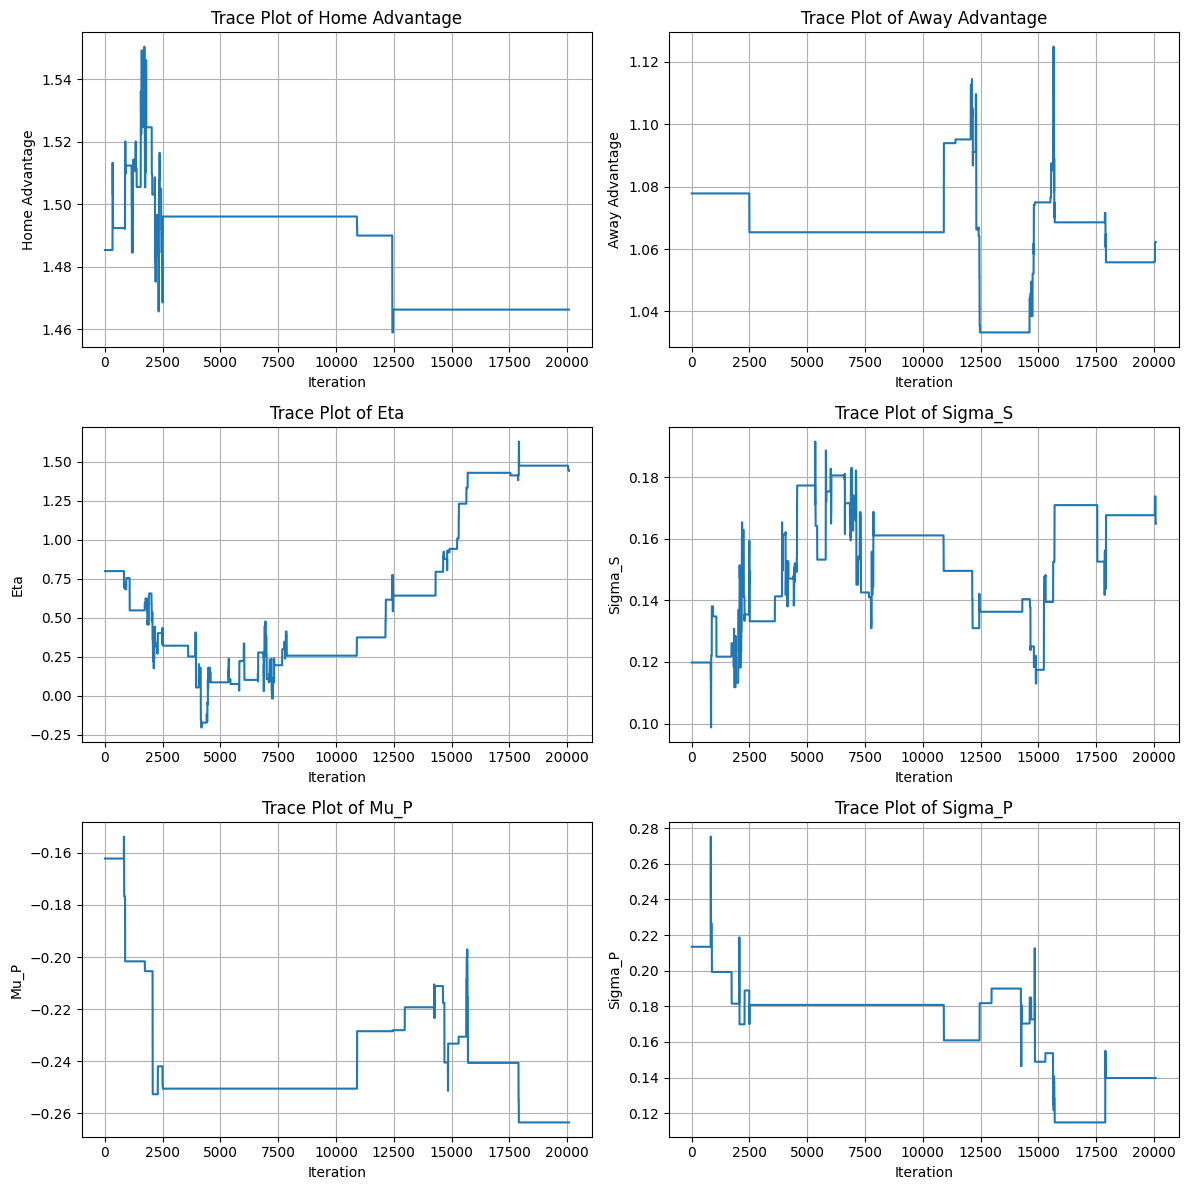

In [40]:
#note, can try plotting global parameters with adjusted timescale with trace_plot_parameter(tracked_parameters[year])
trace_plot_parameter(tracked_parameters[2015])


/Users/josephsun/Desktop/M4R/code/mcmc_functions.py:380: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  joined_df['Strength History'] = joined_df.values.tolist()


Manchester City's strength was greater than Manchester Utd's strength in 87.74026491385321% of the iterations


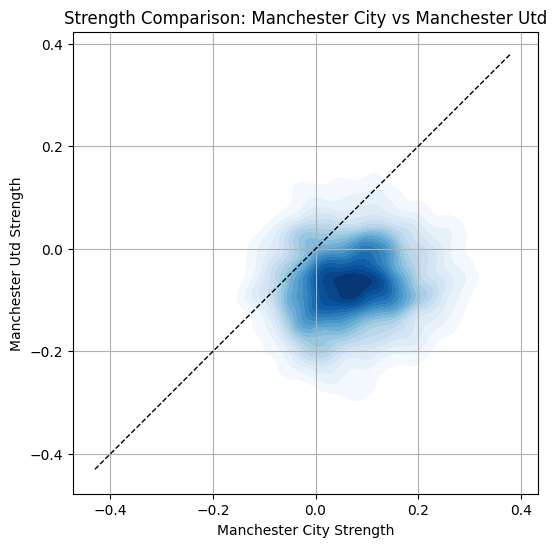

In [29]:
#comparison_plot(strength_histories_one, 'Leicester', 'Arsenal')
comparison_plot(strength_dict, 'Manchester City', 'Manchester Utd', 2015)

/Users/josephsun/Desktop/M4R/code/mcmc_functions.py:380: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  joined_df['Strength History'] = joined_df.values.tolist()


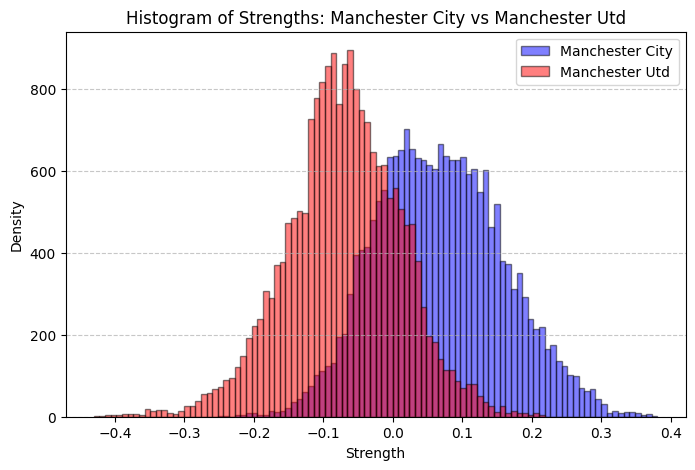

In [34]:
strength_histogram(strength_dict, 'Manchester City', 'Manchester Utd', 2015, bins = 100)


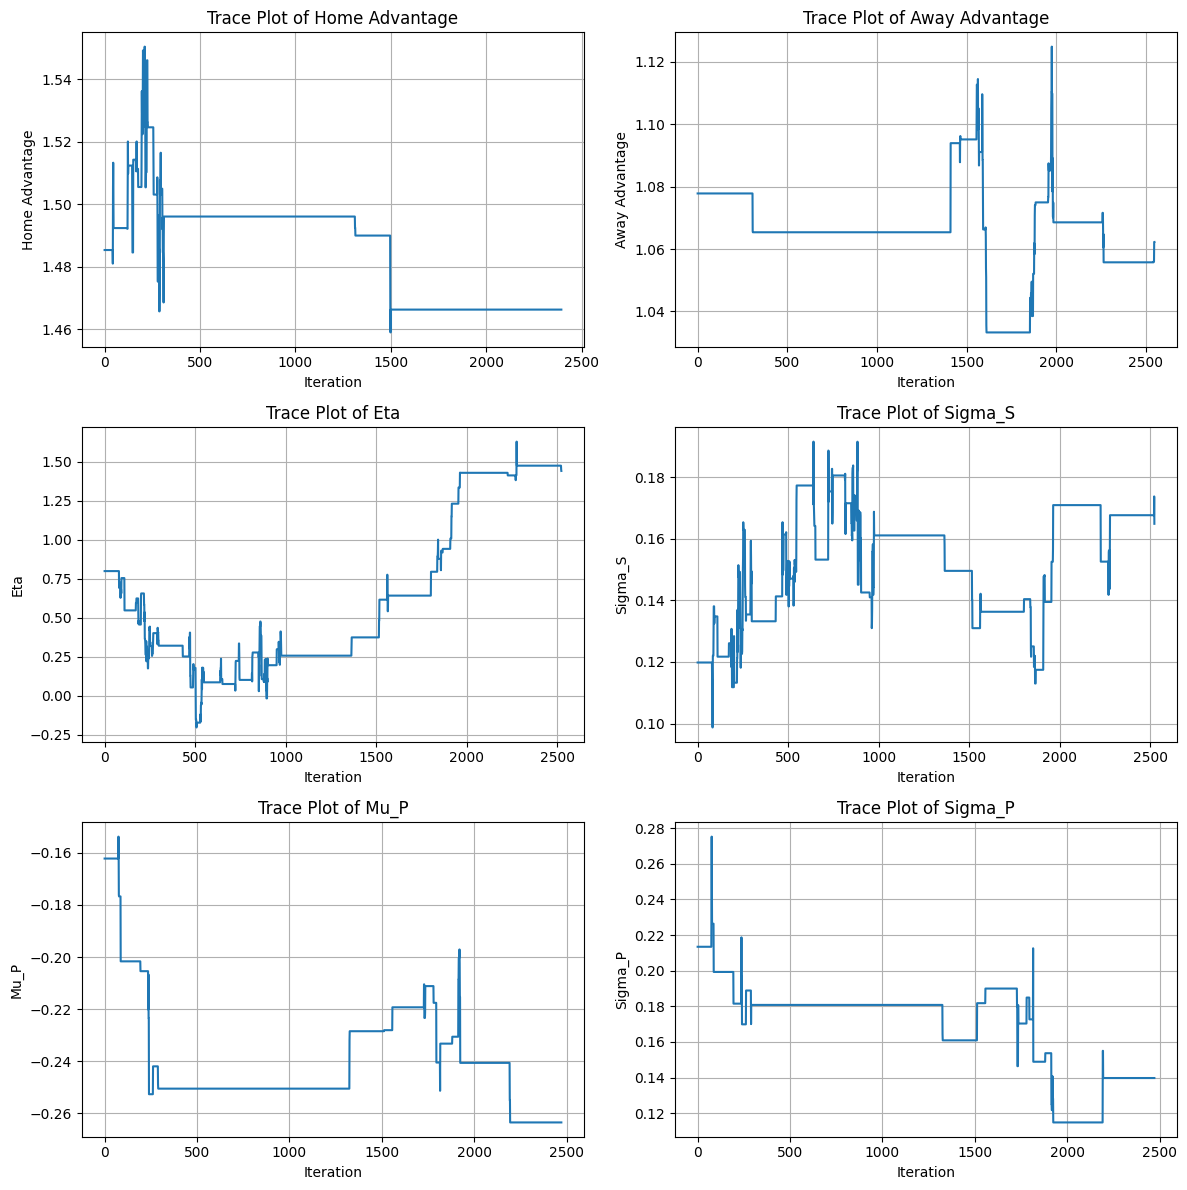

In [31]:
trace_plot_parameter(parameters)

#Note: not sure it's possible to make these plots follow the same timescale as the season strengths.
#each season is selected at random per iteration. 